#### CHIRON to IRAF reformatting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
import astropy.units as u
from glob import glob
from specutils import Spectrum1D

In [2]:
chiron_spectra = glob('tauceti_lily/achi*.fits')

In [11]:
with fits.open(chiron_spectra[0]) as hdus:
    wave = np.copy(hdus[0].data[:,:,0])
    uflux = np.copy(hdus[0].data[:,:,1])
    flux = np.copy(hdus[0].data[:,:,2])
    err = np.copy(hdus[0].data[:,:,3])
    c = np.copy(hdus[0].data[:,:,4])

In [4]:
np.shape(wave)

(62, 3200)

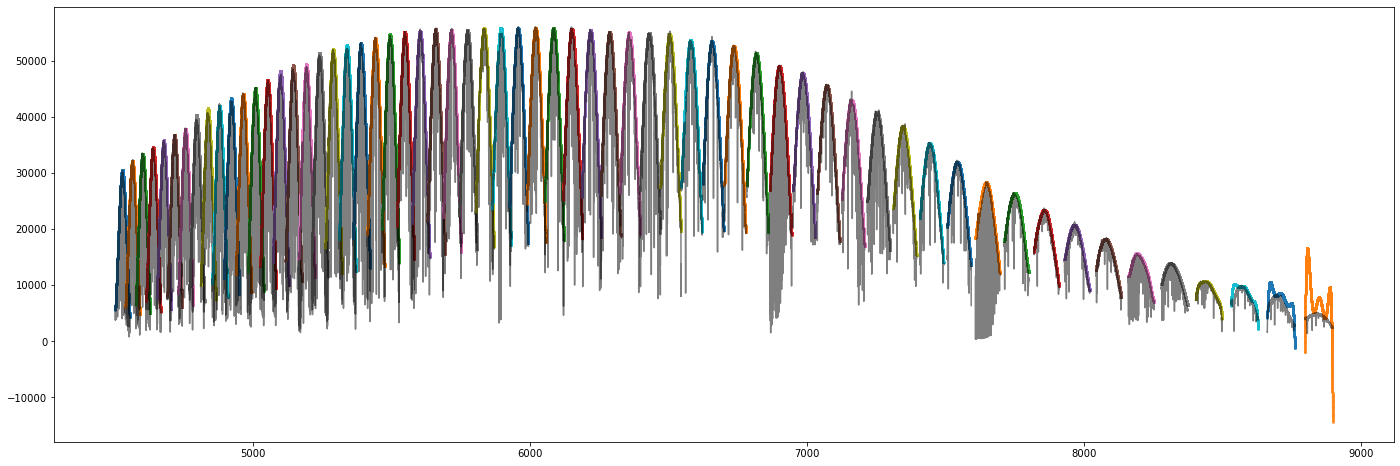

In [7]:
fig, ax = plt.subplots(1,1,figsize=(24,8))
for r in range(np.shape(wave)[0]):
    ax.plot(wave[r], c[r], alpha=0.5, marker='.', ms=4)
    ax.plot(wave[r], uflux[r], alpha=0.5, c='k')
#ax.set_ylim([-0.05,1.2]);

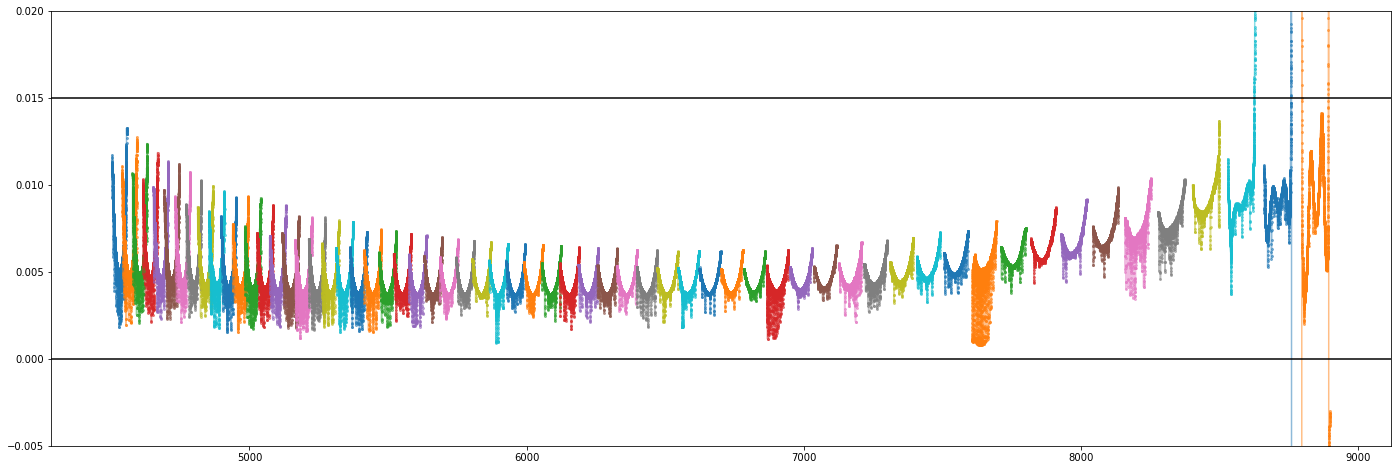

In [8]:
fig, ax = plt.subplots(1,1,figsize=(24,8))
for r in range(np.shape(wave)[0]):
    ax.plot(wave[r], err[r], alpha=0.5, marker='.', ms=4)
ax.set_ylim([-0.005,0.02])
ax.axhline(0.015, c='k')
ax.axhline(0.0, c='k');

In [9]:
# zero out the bad fluxes:
mask = (err > 0.0) & (err < 0.015)
flux[~mask] = 0.0

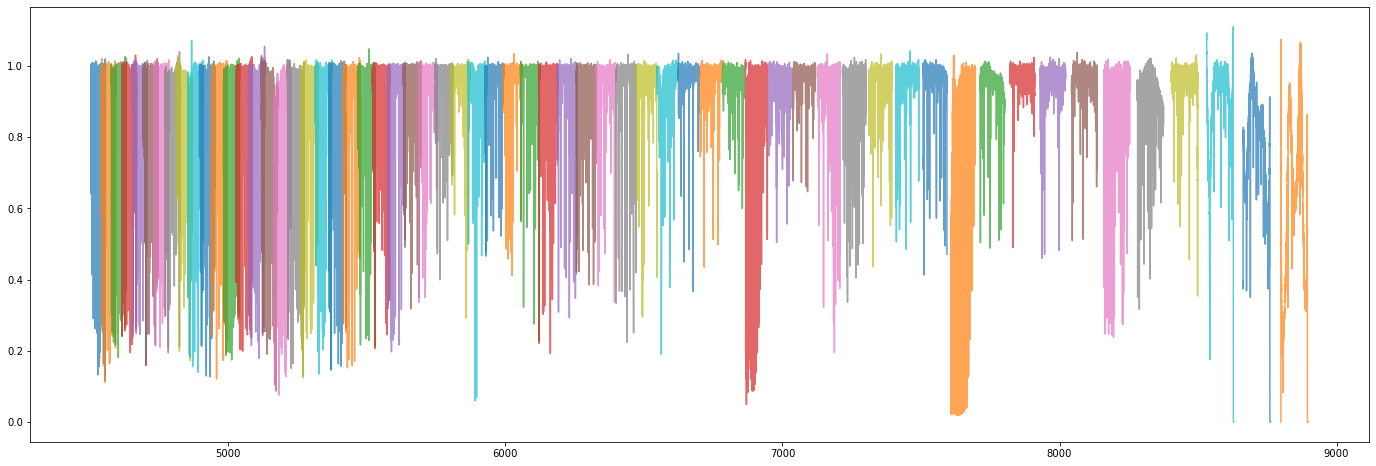

In [10]:
fig, ax = plt.subplots(1,1,figsize=(24,8))
for r in range(np.shape(wave)[0]):
    ax.plot(wave[r], flux[r], alpha=0.7)
    #ax.plot(wave[r], flux[r], alpha=0.5, marker='.', ms=4)

#### order combining:

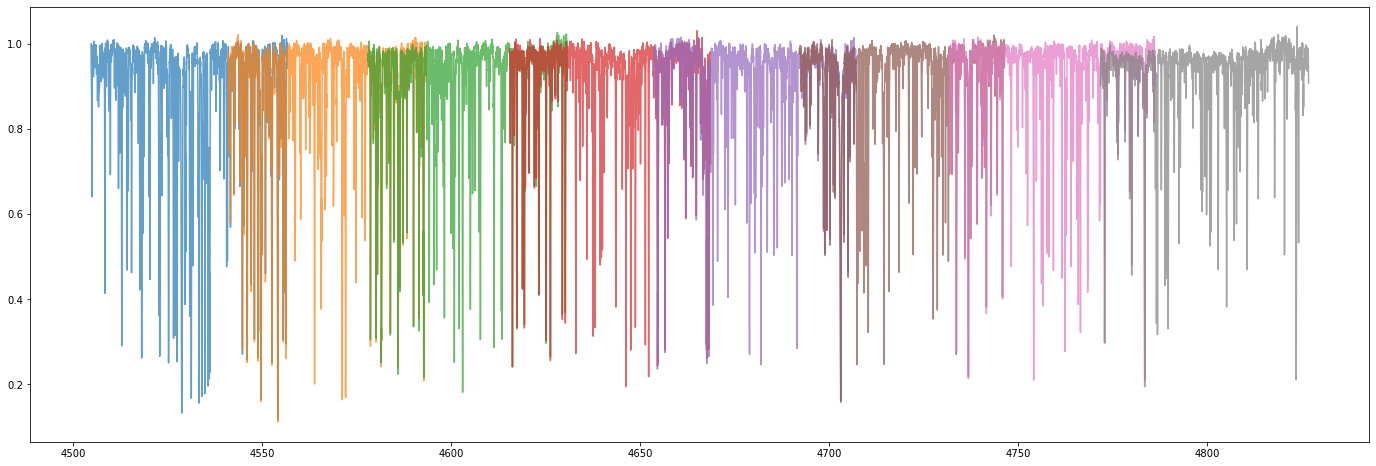

In [11]:
fig, ax = plt.subplots(1,1,figsize=(24,8))
for r in range(0,8):
    ax.plot(wave[r], flux[r], alpha=0.7)

how many Fe lines fall in multiple orders?

In [12]:
ll = np.genfromtxt('/Users/mbedell/Documents/Research/HARPSTwins/Abundances/sun_2015_05_18.moog', usecols=(0,1), skip_header=1, names=('wave','sp')) # wavelengths

In [13]:
linelist = ll['wave'][(ll['sp'] >= 26.0) & (ll['sp'] < 27.0)]

In [14]:
in_orders = np.zeros((len(linelist), np.shape(wave)[0]))
n_orders = np.zeros_like(linelist)
for i,line in enumerate(linelist):
    in_order = (line >= wave[:,0]) & (line <= wave[:,-1])
    in_orders[i,:] = in_order
    n_orders[i] = np.sum(in_order)

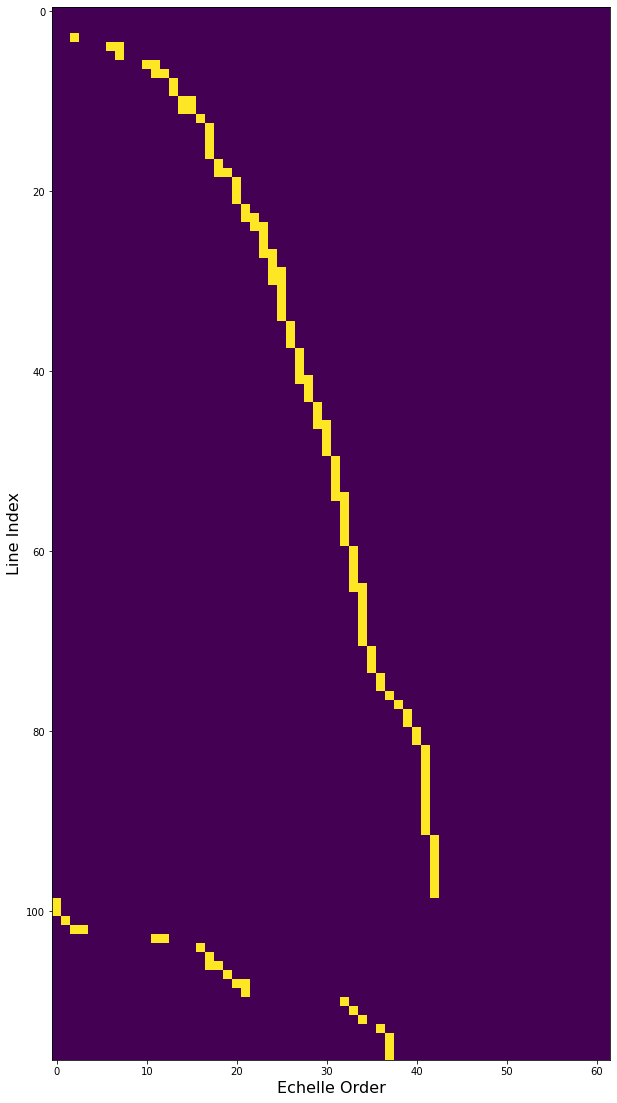

In [15]:
ax, fig = plt.subplots(1,1, figsize=(10,20))
fig.imshow(in_orders)
fig.set_xlabel('Echelle Order', fontsize=16)
fig.set_ylabel('Line Index', fontsize=16);

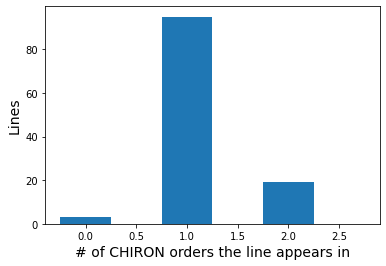

In [16]:
plt.hist(n_orders,bins=np.linspace(0,3,7), align='left')
plt.xlabel('# of CHIRON orders the line appears in', fontsize=14)
plt.ylabel('Lines', fontsize=14);

#### writing to fits:

coordinates mapping: is the wavelength scale linear?

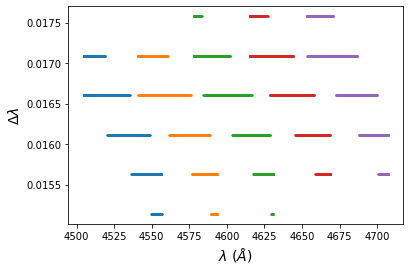

In [17]:
for r in range(5):
    plt.plot(wave[r,:-1], np.diff(wave[r,:]), marker='.', ms=3, linestyle='')
plt.xlabel(r'$\lambda$ ($\AA$)', fontsize=14)
plt.ylabel(r'$\Delta \lambda$', fontsize=14);

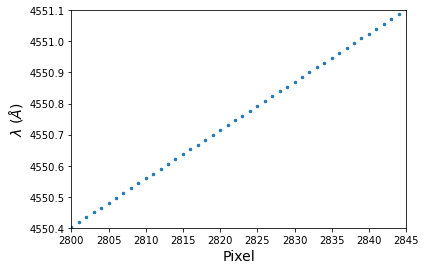

In [36]:
for r in range(1):
    plt.plot(wave[r,:-1], marker='.', ms=5, linestyle='')
plt.ylabel(r'$\lambda$ ($\AA$)', fontsize=14)
plt.xlabel(r'Pixel', fontsize=14)
plt.ylim([4550.4,4551.1])
plt.xlim([2800,2845]);

In [20]:
wave[0,-10:]

array([4556.4253, 4556.441 , 4556.456 , 4556.471 , 4556.487 , 4556.502 ,
       4556.517 , 4556.5327, 4556.548 , 4556.563 ], dtype=float32)

In [41]:
wave[1,:][(wave[1,:]>=wave[0,-10])&(wave[1,:]<=wave[0,-1])]

array([4556.435 , 4556.4517, 4556.4683, 4556.485 , 4556.502 , 4556.5186,
       4556.535 , 4556.552 ], dtype=float32)

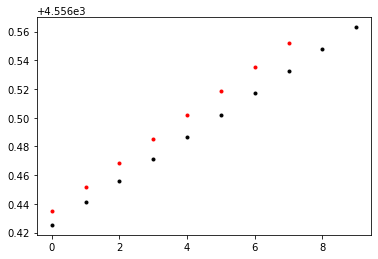

In [43]:
plt.plot(wave[0,-10:], 'k.')
plt.plot(wave[1,:][(wave[1,:]>=wave[0,-10])&(wave[1,:]<=wave[0,-1])], 'r.');

#### barycentric + systemic RV correction

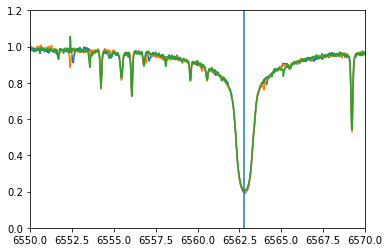

In [48]:
from astropy.constants import c

for spectrum in chiron_spectra[0:3]:
    with fits.open(spectrum) as hdus:
        wave = np.copy(hdus[0].data[:,:,0])
        flux = np.copy(hdus[0].data[:,:,2])
        berv = np.copy(hdus[0].header['BARYCORR']) + 16600.
        doppler = np.sqrt((1 + berv/c.value)/(1 - berv/c.value))
        plt.plot(wave[39] * doppler, flux[39])
plt.xlim([6550,6570])
plt.ylim([0,1.2])
plt.axvline(6562.8);